#### Imports

In [46]:
from sklearn.ensemble import RandomForestClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean

#### Retrieve Stored Variables
Standard dataset

In [47]:
%store -r data

#### Variable That Removes Class Variable and ID from Dataset

In [48]:
clean = list(set(list(data)) - set(['default_payment_next_month', 'id']))

#### Seperate Dataset into Training and Testing Subsets
70/30 split will be used

In [49]:
std_x_train, std_x_test, std_y_train, std_y_test = train_test_split(data[clean], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Instantiate Decision Tree Model Object

In [50]:
model = RandomForestClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [51]:
start = time.time()
model.fit(X = std_x_train,
          y = std_y_train)
results = confusion_matrix(y_pred = model.predict(std_x_test),
                           y_true = std_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 16.74 seconds to train and predict.


#### Display Confusion Matrix

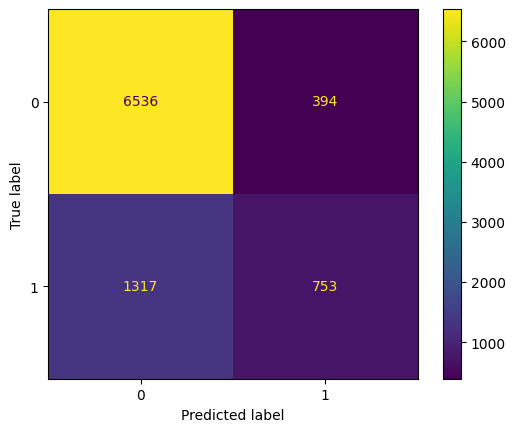

In [52]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [53]:
metrics = evaluation.evalMetrics(results)

In [54]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.81
The Precision of the Model: 0.83
The Recall of the Model: 0.94
The F-Score of the Model: 0.88
The Negative Predictive Value  of the Model: 0.66
The Positive Predicitive Value of the Model: 0.83


#### Cross Validate the Model Using Accuracy

In [55]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data[clean], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### Evaluate the Results of the Cross-Validation

In [56]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 571.86 seconds and produced an average accuracy of 0.817


#### Analyze Feature Importances and Select the 5 Most Meaningful
Create dict of feature values and their associated label

In [57]:
features = {}
for i in range(len(model.feature_importances_)):
    features[model.feature_importances_[i]] = model.feature_names_in_[i]

Select the 5 best features and return the labels as a list. Store this variable in the envrionment for use in the KNN Algorithm.

In [58]:
selected_features = {k: v for k,v in features.items() if k in sorted(features.keys())[::-1][:5]}
selected_features = list(selected_features.values())
selected_features

['bill_amt1', 'age', 'limit_bal', 'pay_0', 'bill_amt2']

In [66]:
%store selected_features

Stored 'selected_features' (list)


#### Retrain Model on Selected Features and Evaluate Change in Performance

In [60]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data[selected_features], 
                                                                    data['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=96)

#### Reinstantiate Model and Fit/Predict

In [61]:
model = RandomForestClassifier()

In [62]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 7.8 seconds to train and predict.


#### Display CF

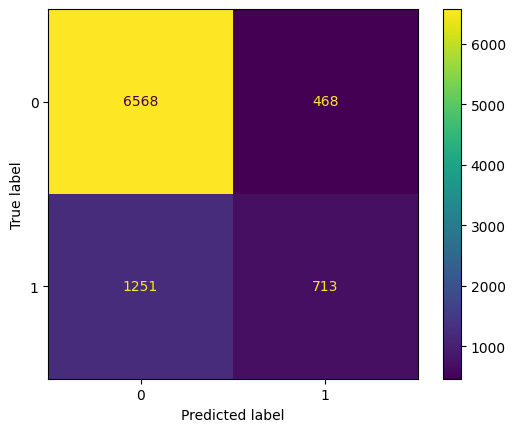

In [63]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate and Cross-Validate

In [64]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.809
The Precision of the Model: 0.84
The Recall of the Model: 0.93
The F-Score of the Model: 0.88
The Negative Predictive Value  of the Model: 0.6
The Positive Predicitive Value of the Model: 0.84


In [65]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=17)
cv_scores = cross_val_score(model, data[selected_features], data['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 317.7 seconds and produced an average accuracy of 0.803
